In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop_df=pd.read_csv("crop_yield_fertilizer_dataset.csv")
crop_df.head()

,Fertilizer_kg_per_hectare,Crop_Yield_tons
0,0.00,0.0
1,1.34,0.0
2,2.68,0.0
3,4.03,0.0
4,5.37,0.0


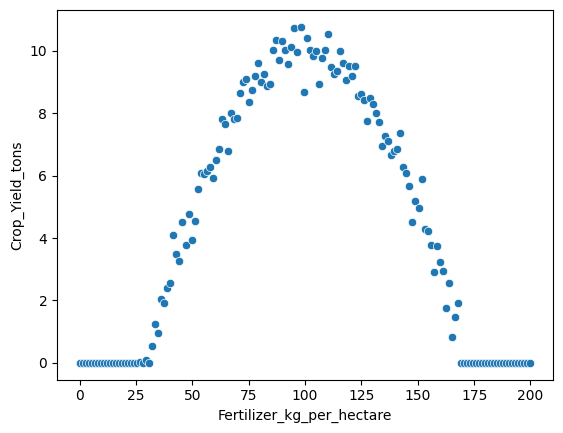

In [3]:
sns.scatterplot(x=crop_df["Fertilizer_kg_per_hectare"],y=crop_df["Crop_Yield_tons"])
plt.show()

In [4]:
# independent and dependent variables
X=crop_df.iloc[:,:-1]
Y=crop_df.iloc[:,-1]

In [5]:
X

,Fertilizer_kg_per_hectare
0,0.00
1,1.34
2,2.68
3,4.03
4,5.37
...,...
145,194.63
146,195.97
147,197.32
148,198.66


In [10]:
Y.unique()

array([ 0.  ,  0.03,  0.1 ,  0.54,  1.23,  0.95,  2.06,  1.91,  2.39,
        2.56,  4.11,  3.48,  3.27,  4.5 ,  3.77,  4.76,  3.95,  4.54,
        5.56,  6.08,  6.04,  6.14,  6.27,  5.91,  6.5 ,  6.84,  7.8 ,
        7.64,  6.78,  8.  ,  7.82,  7.84,  8.64,  9.  ,  9.1 ,  8.35,
        8.74,  9.18,  9.62,  9.25,  8.88,  8.93, 10.01, 10.35,  9.7 ,
       10.3 , 10.03,  9.57, 10.11, 10.72,  9.96, 10.77,  8.69, 10.41,
       10.04,  9.83, 10.  ,  9.78, 10.54,  9.48,  9.27,  9.35,  9.98,
        9.6 ,  9.08,  9.5 ,  8.55,  8.6 ,  8.43,  7.75,  8.48,  8.31,
        8.01,  7.72,  6.95,  7.26,  7.1 ,  6.67,  6.85,  7.37,  6.28,
        5.67,  5.19,  4.96,  5.89,  4.28,  4.24,  3.78,  2.91,  3.75,
        3.24,  2.94,  1.75,  2.57,  0.82,  1.46])

In [11]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [12]:
X_train.shape

(112, 1)

In [13]:
y_train

4       0.00
32      3.48
142     0.00
85      9.35
86      9.98
       ...  
71     10.72
106     7.37
14      0.00
92      8.55
102     7.10
Name: Crop_Yield_tons, Length: 112, dtype: float64

In [14]:
# Standardization
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [15]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [17]:
X_test

array([[-0.07460715],
       [-1.36313956],
       [ 0.97953557],
       [ 0.04250043],
       [-0.00444732],
       [-1.05859004],
       [-0.2854357 ],
       [ 1.51830024],
       [-0.19171473],
       [ 0.13622139],
       [ 0.79209364],
       [-1.50363374],
       [-0.94148247],
       [-1.5739681 ],
       [-1.33975295],
       [-0.47287763],
       [ 0.65159945],
       [-0.16832812],
       [-0.49626424],
       [ 1.3074717 ],
       [-1.10536326],
       [ 1.19036412],
       [-1.17569762],
       [ 1.21375073],
       [ 1.28408509],
       [ 1.61202121],
       [ 0.74532042],
       [ 1.56524799],
       [-0.73065392],
       [-1.08197665],
       [-1.26941859],
       [-1.43347391],
       [-0.26204909],
       [-1.52702035],
       [-0.80081375],
       [ 1.63540782],
       [-0.58998521],
       [-1.15231101]])

In [44]:
# transform into a polynomial feature
from sklearn.preprocessing import PolynomialFeatures
poly_feature=PolynomialFeatures(degree=7,include_bias=True)

In [45]:
X_train_poly=poly_feature.fit_transform(X_train)
X_test_poly=poly_feature.transform(X_test)

In [46]:
X_train_poly

array([[ 1.00000000e+00, -1.69107568e+00,  2.85973695e+00,
        -4.83603161e+00,  8.17809544e+00, -1.38297783e+01,
         2.33872017e+01, -3.95495280e+01],
       [ 1.00000000e+00, -1.03520343e+00,  1.07164615e+00,
        -1.10937178e+00,  1.14842547e+00, -1.18885399e+00,
         1.23070574e+00, -1.27403081e+00],
       [ 1.00000000e+00,  1.54168685e+00,  2.37679835e+00,
         3.66427876e+00,  5.64917037e+00,  8.70925168e+00,
         1.34269388e+01,  2.07001350e+01],
       [ 1.00000000e+00,  2.06381224e-01,  4.25932098e-02,
         8.79043878e-03,  1.81418152e-03,  3.74413003e-04,
         7.72718140e-05,  1.59474516e-05],
       [ 1.00000000e+00,  2.29942361e-01,  5.28734896e-02,
         1.21578551e-02,  2.79560590e-03,  6.42828222e-04,
         1.47813439e-04,  3.39885713e-05],
       [ 1.00000000e+00, -1.40991278e+00,  1.98785404e+00,
        -2.80270081e+00,  3.95156368e+00, -5.57136012e+00,
         7.85513182e+00, -1.10750507e+01],
       [ 1.00000000e+00, -1.550581

In [47]:
# apply regression model
from sklearn.linear_model import LinearRegression
poly_reg=LinearRegression(n_jobs=-1)

In [48]:
poly_reg.fit(X_train_poly,y_train)

LinearRegression(n_jobs=-1)

In [49]:
print(poly_reg.coef_)

[ 0.         -0.83189807 -7.95729556  0.95204297  1.00467696 -0.47503657
  0.19484276  0.09263494]


In [50]:
print(poly_reg.intercept_)

10.113329753202635


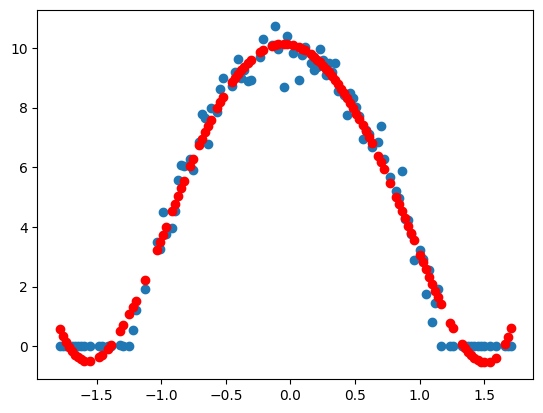

In [51]:
# lets visualize the model
plt.scatter(X_train,y_train)
plt.scatter(X_train,poly_reg.predict(X_train_poly),color="red")
plt.show()

In [52]:
y_pred=poly_reg.predict(X_test_poly)

In [53]:
y_pred

array([10.13074008,  0.19459034,  3.30710271, 10.06367688, 10.116872  ,
        2.97686976,  9.68799407, -0.54497094,  9.97513072,  9.85508125,
        5.24863219, -0.43421642,  4.26449187, -0.50222695,  0.35195051,
        8.68984625,  6.60097825, 10.02423087,  8.52756376,  0.25008308,
        2.47699511,  1.20354364,  1.75875272,  0.99488401,  0.42007184,
       -0.26472355,  5.71317918, -0.4680856 ,  6.50636075,  2.72521028,
        0.89723915, -0.19370978,  9.77315056, -0.47734654,  5.78902487,
       -0.10959332,  7.80042445,  1.99209603])

In [55]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

r2_val=r2_score(y_true=y_test,y_pred=y_pred)
print(r2_val)

0.9844429795531041


In [56]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)

0.2638305703044866
0.41747329343682893
